In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import display, HTML

In [2]:
training = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/train.csv')
#training = pd.read_csv('/Users/huannguyen/Documents/GitHub/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/train.csv')

X_test = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/test.csv')
#X_test = pd.read_csv('/Users/huannguyen/Documents/GitHub/ProjectPracticing/2023_10(2) House Prices - Advanced Regression Techniques/test.csv')

print('Training dataset: ', training.shape)
print('Testing dataset: ', X_test.shape, '\n')

print(training.columns)


Training dataset:  (1460, 81)
Testing dataset:  (1459, 80) 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars',

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [5]:
df_num = training.select_dtypes(include = np.number)

stats_num = df_num.describe().T

scroll_stats_num = create_scrollable_table(stats_num, 'stats_num', 'Numerical Cols Summary')
display(HTML(scroll_stats_num))

print(df_num.select_dtypes(include=['object', 'category']))
print(df_num.info(), '\n')
print('Numerical dataset: ', df_num.shape)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1460 rows x 0 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64

In [6]:
df_cat = training.select_dtypes(include=['object', 'category'])

stats_cat = df_cat.describe().T

scoll_stats_cat = create_scrollable_table(stats_cat, 'stats_cat', 'Categorical Cols Summary')
display(HTML(scoll_stats_cat))

print(df_cat.info(), '\n')
print('Categorical dataset: ', df_cat.shape)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [7]:
null_count = training.isnull().sum().to_frame()
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Number of null values of each column')
display(HTML(scroll_null_count))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [8]:
null_percent = null_count / training.shape[0] * 100
scroll_null_percent = create_scrollable_table(null_percent, 'null_percent', 'Percentage of null values of each column')
display(HTML(scroll_null_percent))

print(null_percent[null_percent.values >= 10])
large_null_cols = null_percent[null_percent.values >= 10].index
len(large_null_cols)

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


                     0
LotFrontage  17.739726
Alley        93.767123
MasVnrType   59.726027
FireplaceQu  47.260274
PoolQC       99.520548
Fence        80.753425
MiscFeature  96.301370


7

In [9]:
excluded_large_missing = training.drop(large_null_cols, axis=1)

In [10]:
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [11]:
training.isnull().any(axis=1) 
#length = 1460 ==> all rows have null values

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Length: 1460, dtype: bool

In [12]:
missing_rows = excluded_large_missing[excluded_large_missing.isnull().any(axis=1)]
scroll_missing_rows = create_scrollable_table(missing_rows, 'missing_rows', 'Rows with missing values (after dropping)')
display(HTML(scroll_missing_rows))

missing_rows.shape

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
90,91,20,RL,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
99,100,20,RL,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
102,103,90,RL,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
108,109,50,RM,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000


(122, 74)

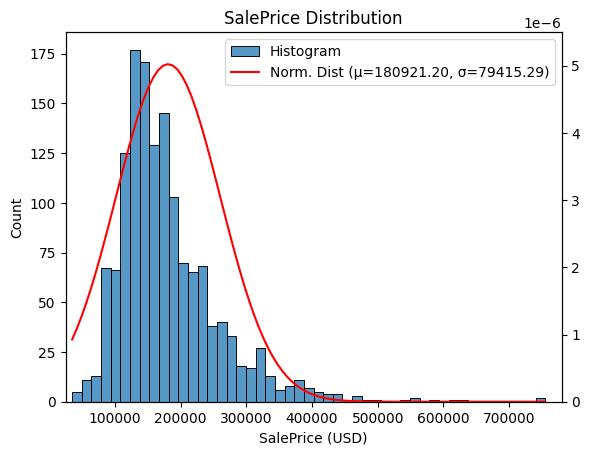

In [13]:
import scipy.stats as stats
df = excluded_large_missing

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

SP_hist = sns.histplot(df['SalePrice'], label='Histogram', ax=ax1)
ax1.set_xlim(25000, 780000)
ax1.set_xlabel('SalePrice (USD)')
ax1.set_title('SalePrice Distribution')
ax1.legend_ = None

x_norm = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)
mu, sigma = stats.norm.fit(df['SalePrice'])
y_norm    = stats.norm.pdf(x_norm, mu, sigma)

Norm_line = sns.lineplot(x=x_norm, y=y_norm, color='red', ax=ax2, label=f'Norm. Dist (μ={mu:.2f}, σ={sigma:.2f})')
ax2.set_ylim(0, 5.5e-6)
ax2.legend_ = None

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(handles = h1 + h2)

plt.show()

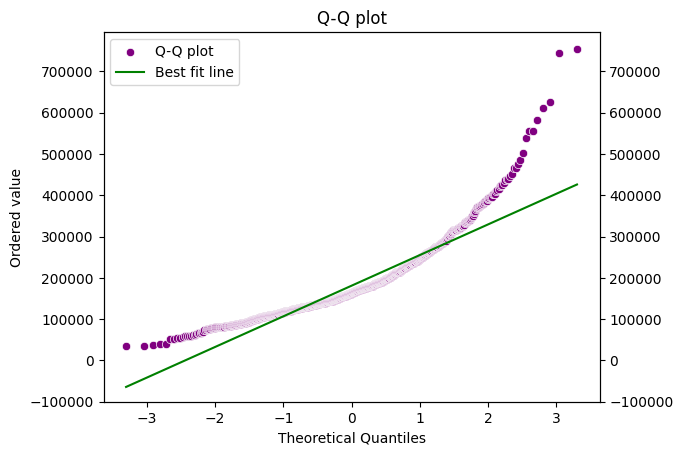

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

qq_data = stats.probplot(df['SalePrice'], dist='norm')
QQ_plot = sns.scatterplot(x=qq_data[0][0], y=qq_data[0][1], color='purple', label='Q-Q plot', ax=ax1)
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Ordered value')
ax1.set_title('Q-Q plot')
ax1.set_ylim(-100000, qq_data[0][1][-1]+40000)
QQ_plot.legend_ = None

slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
x_line = qq_data[0][0]
y_line = intercept + slope * x_line
Fit_line = sns.lineplot(x=x_line, y=y_line, color='green', label='Best fit line', ax=ax2)
ax2.set_ylim(-100000, qq_data[0][1][-1]+40000)
Fit_line.legend_ = None

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(handles = h1+h2)

In [15]:
def show_bar_USD(ax):
    for c in ax.containers:
        labels = []
        for bar in c:
            labels.append(f'${(bar.get_height()/1000):.2f}K')
        ax.bar_label(c, labels=labels, label_type='edge')

In [16]:
def show_bar_value(ax):
    for c in ax.containers:
        labels = []
        for bar in c:
            labels.append(f'{bar.get_height():.0f}')
        ax.bar_label(c, labels=labels, label_type='edge')

C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\668983262.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  BldType_plot = sns.barplot(df['BldgType'].value_counts(), palette='plasma', ax=ax1)
C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\668983262.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  BldType_SP_plot = sns.barplot(BldType_SP, palette='plasma', ax=ax2)


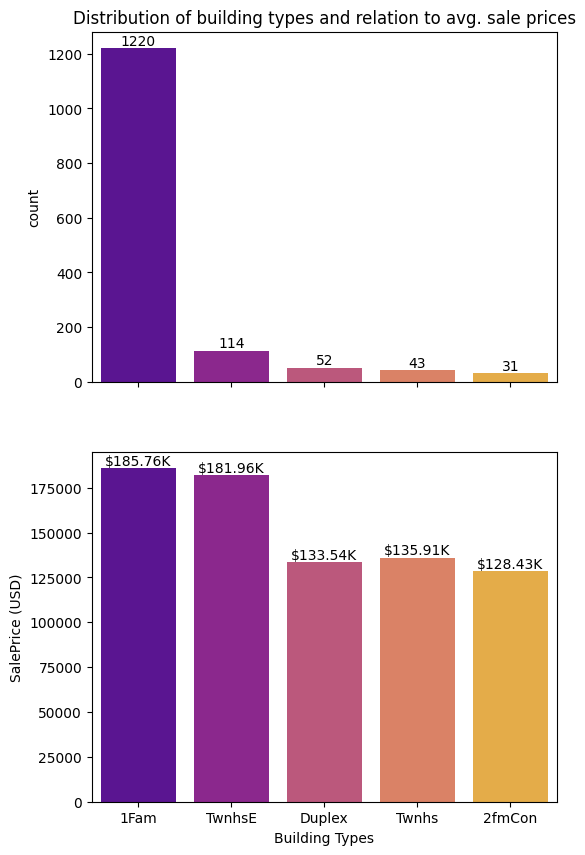

In [35]:
#DATA EXPLORATION:

#1. Distribution of dwelling types and their relation to sale prices:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,10), sharex=True)

BldType_plot = sns.barplot(df['BldgType'].value_counts(), palette='plasma', ax=ax1)
BldType_list = df['BldgType'].value_counts().index.tolist()
ax1.set_title('Distribution of building types and relation to avg. sale prices')
ax1.set_xlabel('Building Types')
show_bar_value(ax1)

BldType_SP = df.groupby('BldgType')['SalePrice'].mean()
BldType_SP = BldType_SP.reindex(BldType_list)
BldType_SP_plot = sns.barplot(BldType_SP, palette='plasma', ax=ax2)
ax2.set_xlabel('Building Types')
ax2.set_ylabel('SalePrice (USD)')
show_bar_USD(ax2)


C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\999988611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Zone_SP_plot = sns.barplot(Zone_SP, palette='plasma', ax=ax)


Text(0.5, 0, 'Zone')

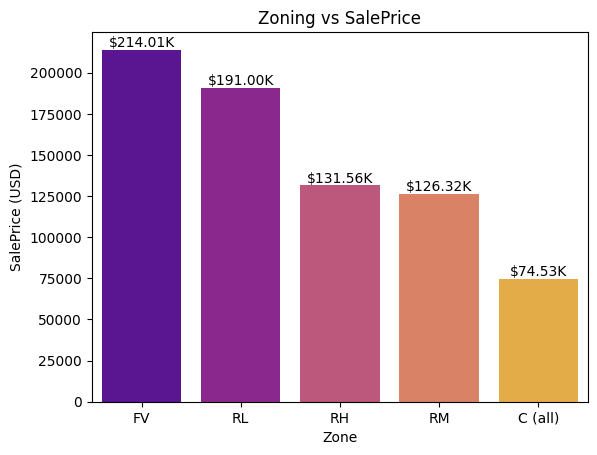

In [51]:
#2. Impact of zoning on sale prices
fig, ax = plt.subplots()

Zone_SP = df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)
Zone_SP_plot = sns.barplot(Zone_SP, palette='plasma', ax=ax)
show_bar_USD(ax)
ax.set_title('Zoning vs SalePrice')
ax.set_ylabel('SalePrice (USD)')
ax.set_xlabel('Zone')

C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\39506512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Str_SP_plot = sns.barplot(Str_SP, palette='plasma', ax=ax1)


Text(0.5, 1.0, 'Street vs. SalePrice')

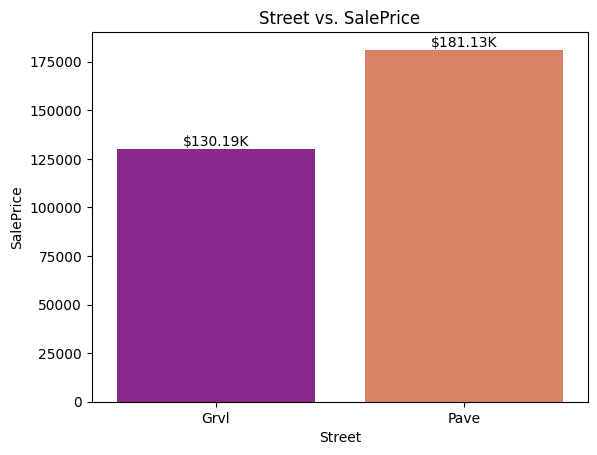

In [59]:
#3. Impact of street on sale prices:
fig, ax1 = plt.subplots()

Str_SP = df.groupby('Street')['SalePrice'].mean()
Str_SP_plot = sns.barplot(Str_SP, palette='plasma', ax=ax1)
show_bar_USD(ax1)
ax1.set_title('Street vs. SalePrice')


C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\1364195670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Shape_SP_plot = sns.barplot(Shape_SP, palette='plasma', ax=ax1)
C:\Users\hangu\AppData\Local\Temp\ipykernel_20236\1364195670.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  Contour_SP_plot = sns.barplot(Contour_SP, palette='plasma', ax=ax2)


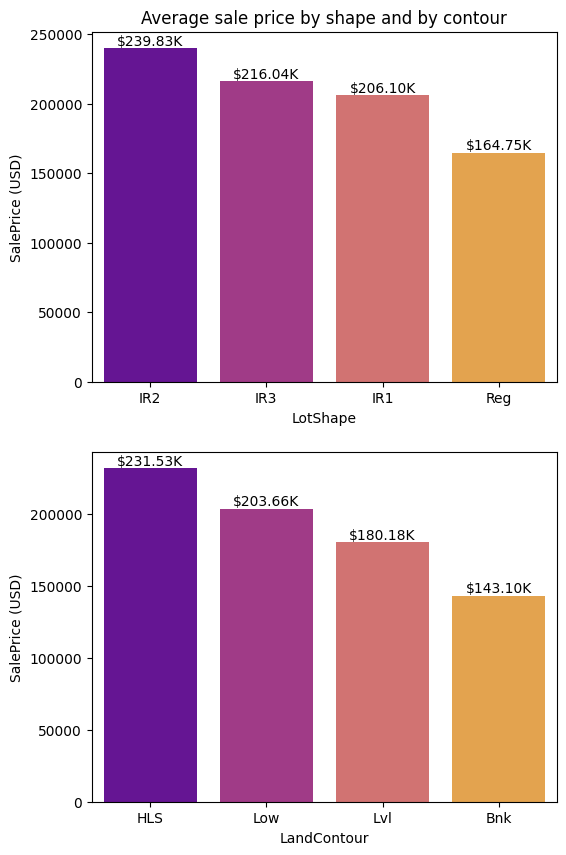

In [70]:
#4. Average sale price by property shape:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,10))

Shape_SP = df.groupby('LotShape')['SalePrice'].mean().sort_values(ascending=False)
Shape_SP_plot = sns.barplot(Shape_SP, palette='plasma', ax=ax1)
ax1.set_title('Average sale price by shape and by contour')
ax1.set_ylabel('SalePrice (USD)')
show_bar_USD(ax1)

Contour_SP = df.groupby('LandContour')['SalePrice'].mean().sort_values(ascending=False)
Contour_SP_plot = sns.barplot(Contour_SP, palette='plasma', ax=ax2)
ax2.set_ylabel('SalePrice (USD)')
show_bar_USD(ax2)

Text(0.5, 0, 'PropertyAge')

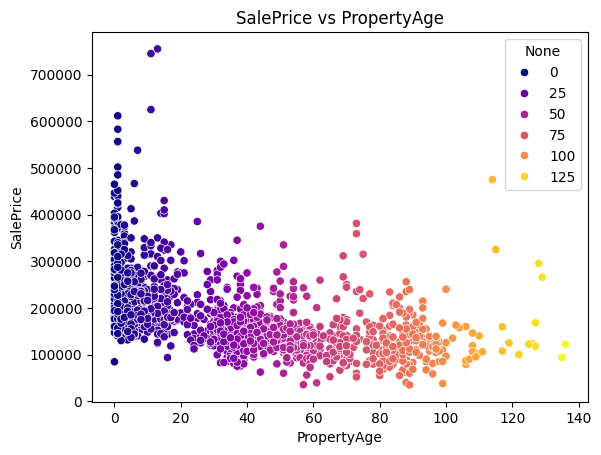

In [76]:
#5. SalePrice vs. PropertyAge:
fig, ax = plt.subplots()

PropertyAge = df['YrSold'] - df['YearBuilt']
PropertyAge_SP = sns.scatterplot(x=PropertyAge, y=df['SalePrice'], hue=PropertyAge ,palette='plasma', ax=ax)
ax.set_title('SalePrice vs PropertyAge')
ax.set_xlabel('PropertyAge')

Correlation between SalePrice and Living Area is: 0.70862


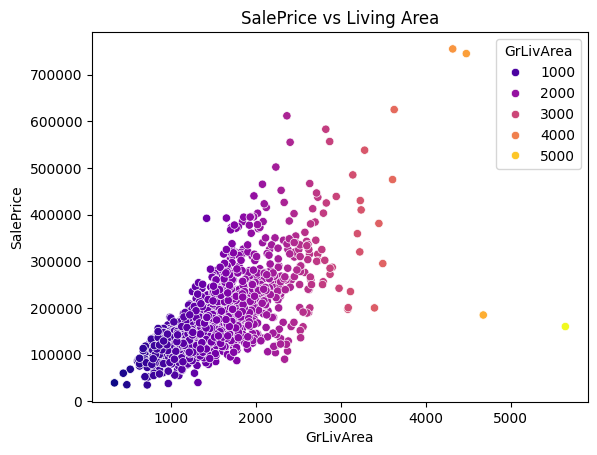

In [82]:
#6. SalePrice vs. Living Area:
fig, ax = plt.subplots()

Area_SP_plot = sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue=df['GrLivArea'], palette='plasma', ax=ax)
ax.set_title('SalePrice vs Living Area')

Area_SP_corr = df['GrLivArea'].corr(df['SalePrice'])
print(f'Correlation between SalePrice and Living Area is: {Area_SP_corr:.5f}')

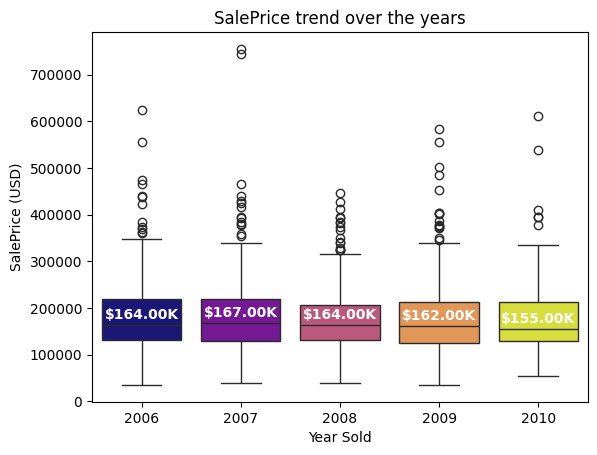

In [104]:
#7. Boxplot showing SalePrice trends over the years:
fig, ax = plt.subplots()

Yr_SP_plot = sns.boxplot(data=df, x='YrSold', y='SalePrice', hue=df['YrSold'], palette='plasma', ax=ax)
ax.legend_ = None
ax.set_xlabel('Year Sold')
ax.set_ylabel('SalePrice (USD)')
ax.set_title('SalePrice trend over the years')


median = df.groupby('YrSold')['SalePrice'].median()
vertical_offset = df['SalePrice'].median() * 0.08
for xtick in Yr_SP_plot.get_xticks():
    plt.text(xtick, median.values[xtick]+vertical_offset,
             f'${(median.values[xtick]/1000):.2f}K',
             horizontalalignment='center', color='white', weight='semibold')